# <center> Tree Models </center>

### Decision Tree basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_df = sns.load_dataset('iris')
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

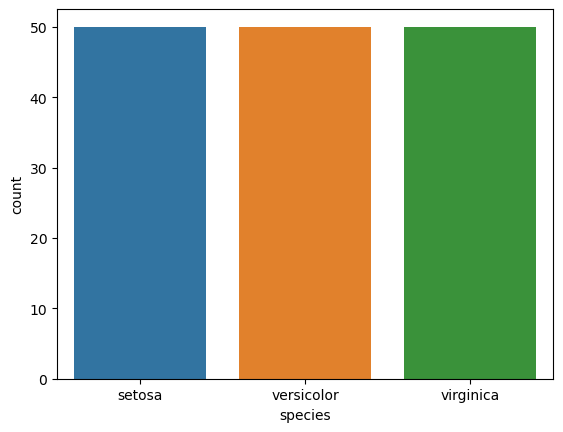

In [4]:
sns.countplot(data=iris_df, x='species')
plt.show()

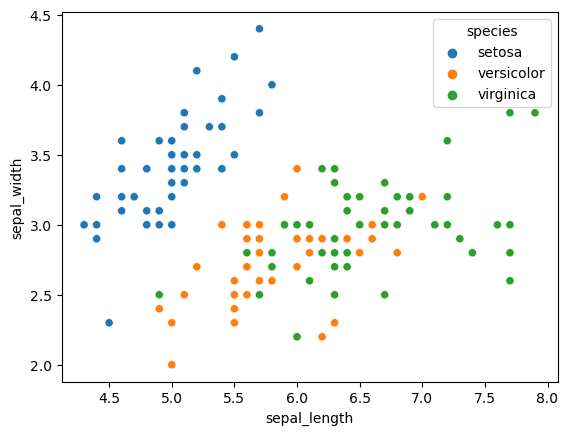

In [5]:
sns.scatterplot(data=iris_df, 
                x='sepal_length',
                y='sepal_width',
                hue = 'species')
plt.show()

In [6]:
#biến đổi dữ liệu dạng nominal thay vì sử dụng hàm map thì có thể sử dụng thư viện trong sklearn
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.species.unique()) # giống việc tạo ra từ điển dictionary để map dữ liệu phải transform nó.
iris_df.species = le.transform(iris_df.species) # map data
iris_df.species.unique()

array([0, 1, 2])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(iris_df[['sepal_length','sepal_width']], iris_df['species'], test_size=0.2, random_state=42)

In [9]:
tree = DecisionTreeClassifier(max_depth=5, max_features=2) #max_depth quy định cây có bao nhiêu tầng.
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [10]:
y_pred = tree.predict(xtest)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.78      0.64         9
           2       0.75      0.55      0.63        11

    accuracy                           0.73        30
   macro avg       0.76      0.74      0.74        30
weighted avg       0.77      0.73      0.74        30



In [11]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

/Users/hanh/miniconda3/envs/hanhtth/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


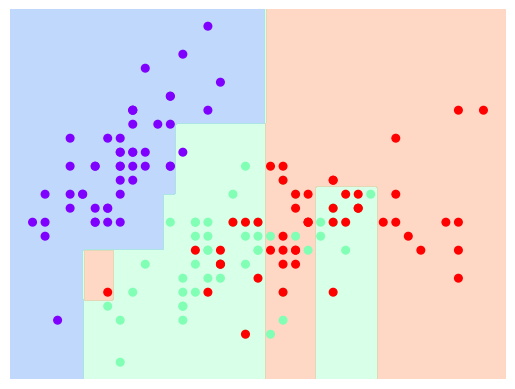

In [12]:
visualize_classifier(tree, iris_df[['sepal_length','sepal_width']], iris_df['species'])

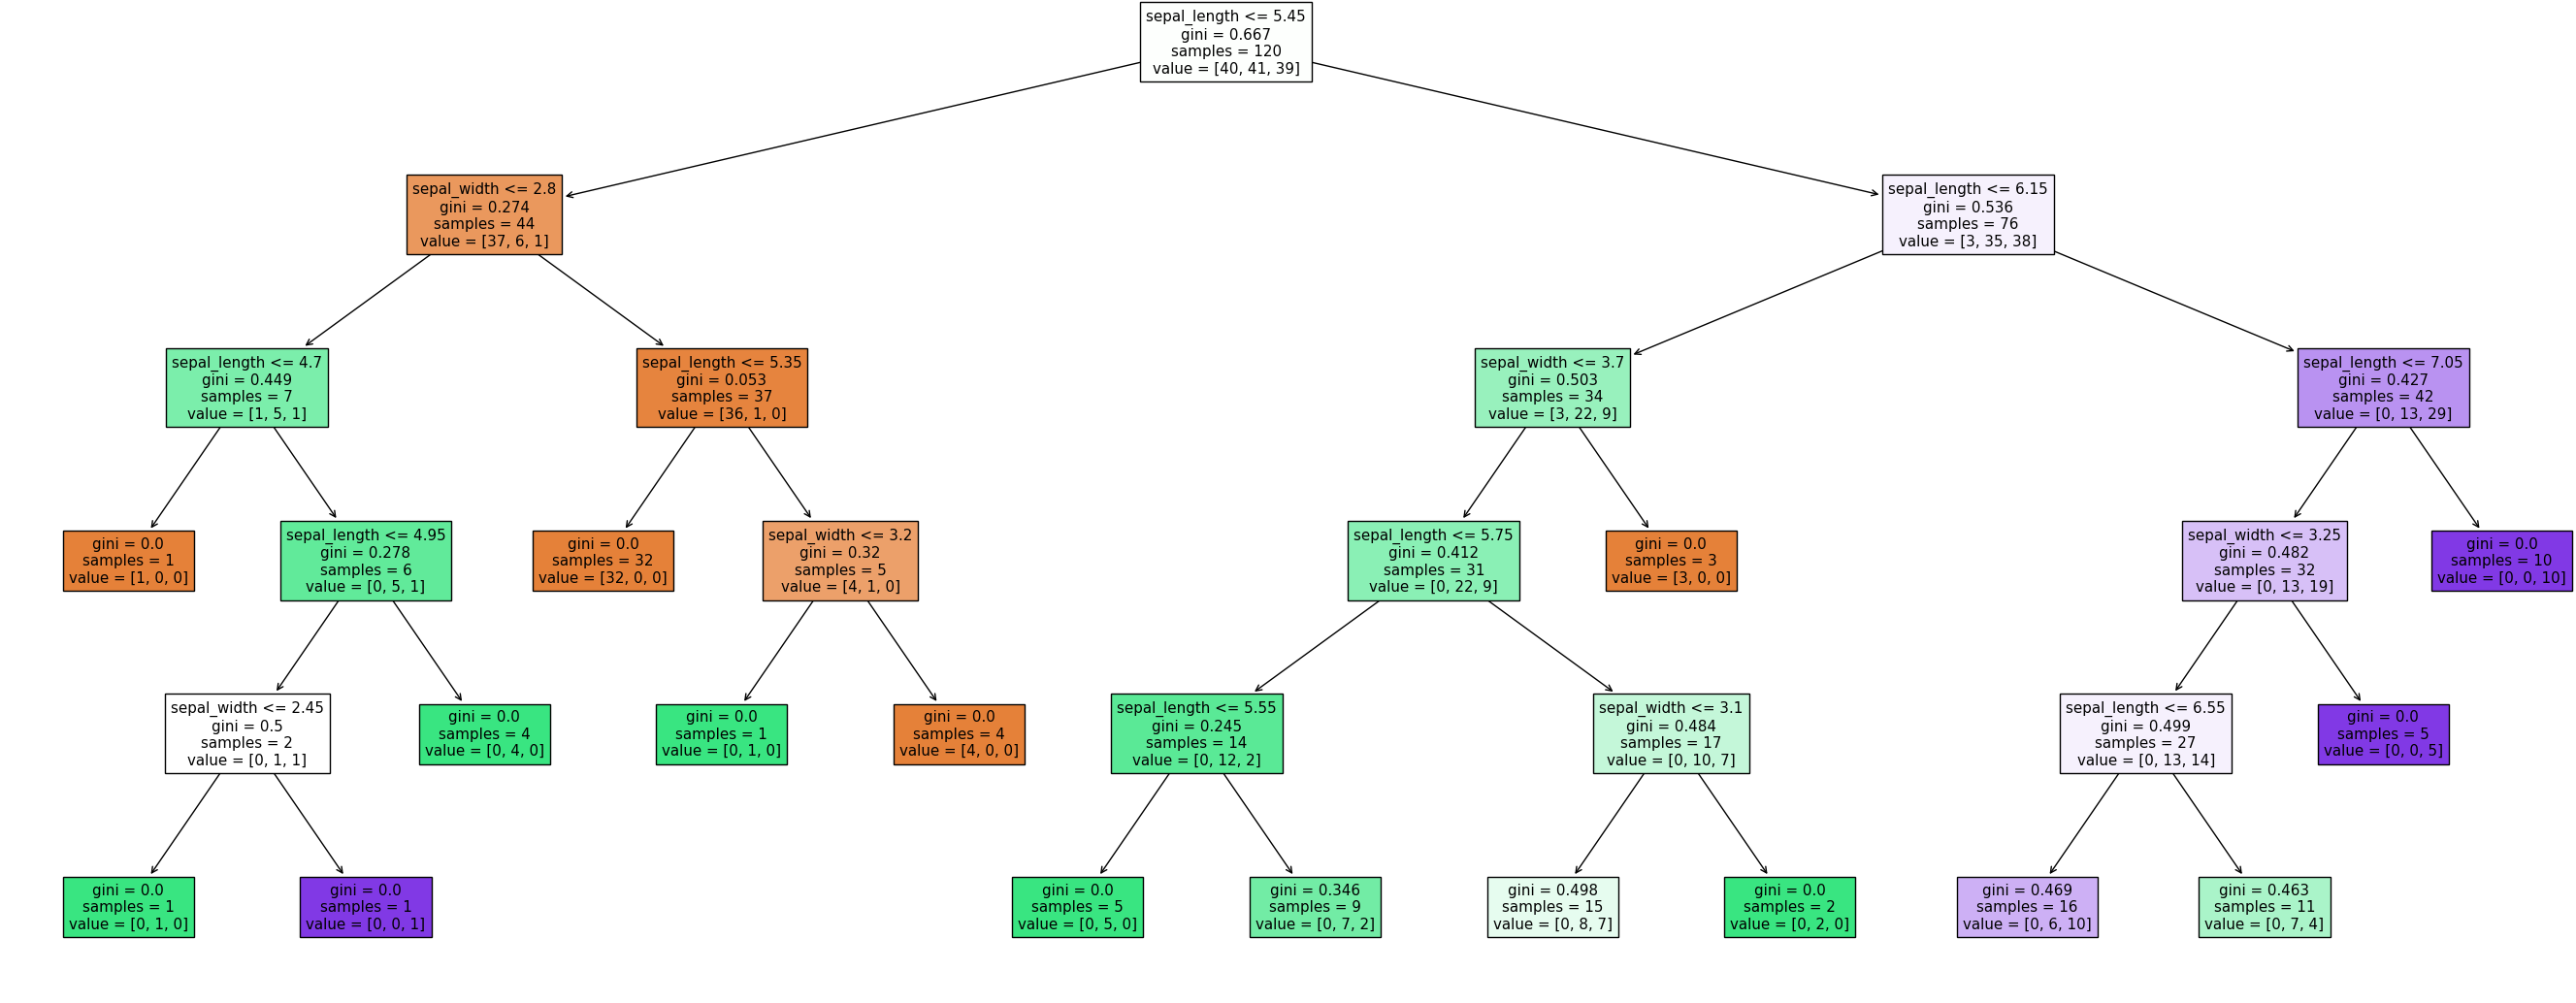

In [13]:
#plot tree.
plt.figure(figsize=(25,10))
_ = plot_tree(tree, feature_names=xtrain.columns, max_depth=5, filled=True)
plt.show()

### Random Forest

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

In [14]:
# sử dụng hàm replace
# biến đổi tất cả giá trị lớn hơn 0:  sử dụng để ép kiểu và gán dữ liệu 
iris_df.species.gt(0).astype(int).value_counts() #greater than 0
#gt:>
#ge:>=
#eq: ==
# ne:!=
#lt: <
#ln:<=

1    100
0     50
Name: species, dtype: int64

In [15]:
iris_df['target']=iris_df.species.gt(0).astype(int)
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,target
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1
149,5.9,3.0,5.1,1.8,2,1


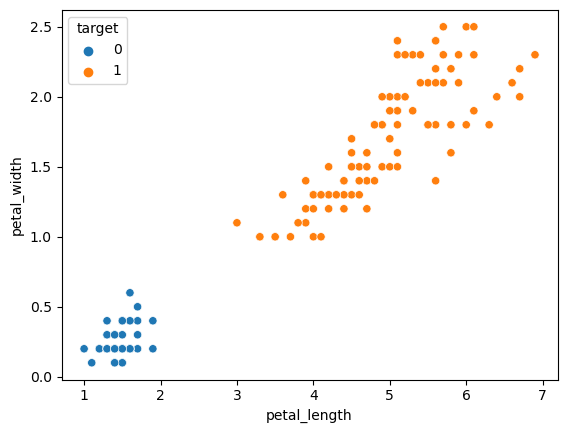

In [16]:
sns.scatterplot(data=iris_df,
               x='petal_length',
               y='petal_width',
               hue='target')
plt.show()


In [17]:
X,y = iris_df[['petal_length','petal_width']],iris_df['target']
X_train, x_test, y_train, y_test=train_test_split(X, y, random_state=42)

In [18]:
from sklearn.svm import SVC

In [28]:
clf=SVC()
clf.fit(X_train, y_train)
pred=clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        23

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [29]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/Users/hanh/miniconda3/envs/hanhtth/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


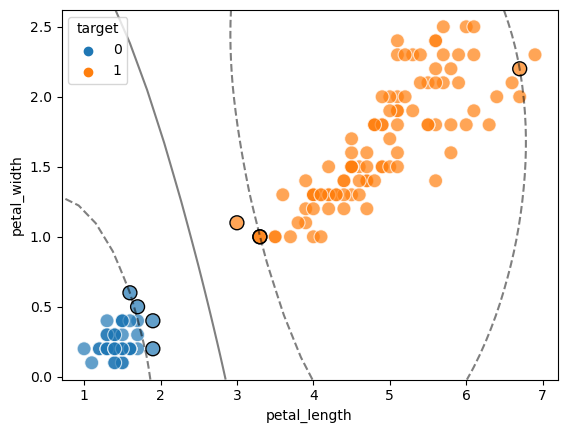

In [30]:
ax = sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(clf, ax=ax, plot_support=True)
plt.show()